In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report as c_rep

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [496]:
glass_link = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/10.Outliers/glass.csv'

glass_data = pd.read_csv(glass_link, delimiter=',')

In [497]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [498]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [499]:
for col in glass_data.columns:
  print(col, glass_data[col].unique())

RI [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1.51709 1.5166 

In [500]:
X_train, X_test, y_train, y_test = train_test_split(glass_data.drop('Type', axis=1), glass_data['Type'], random_state=42, test_size=0.2)

In [501]:
rfc_model = RandomForestClassifier(random_state=42, 
                                  n_estimators=150,
                                  max_depth=6,
                                  max_samples=0.5,
                                  max_features=0.5)

In [502]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.5, max_samples=0.5,
                       n_estimators=150, random_state=42)

In [503]:
rfc_predictions = rfc_model.predict(X_test)

In [504]:
rfc_predictions

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 5, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1])

In [505]:
raw_train = rfc_model.score(X_train, y_train)
raw_train

0.935672514619883

In [506]:
raw_test = rfc_model.score(X_test, y_test)
raw_test

0.8372093023255814

In [507]:
rfc_metrics = c_rep(y_test, rfc_predictions)

In [508]:
print(rfc_metrics)

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.83      0.71      0.77        14
           3       1.00      0.33      0.50         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.84        43
   macro avg       0.92      0.80      0.82        43
weighted avg       0.87      0.84      0.83        43



In [509]:
def draw_graphs(df: pd.core.frame.DataFrame, dt_cols:list):
  sns.set_theme()
  num_title = 0
  if(len(dt_cols)%2):
    len_cols = int((len(dt_cols) + 1) // 2) 
  else:
    len_cols = int(len(dt_cols) // 2)

  fig, ax = plt.subplots(nrows=len_cols, ncols=2, figsize=(17,25))
  for i in range(len_cols):
    for k in range(2):
      try:
        sns.boxplot(ax=ax[i, k], y=glass_data[dt_cols[num_title]], x=glass_data['Type'])
        num_title+=1
      except:
        return

In [510]:
dataframe_cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

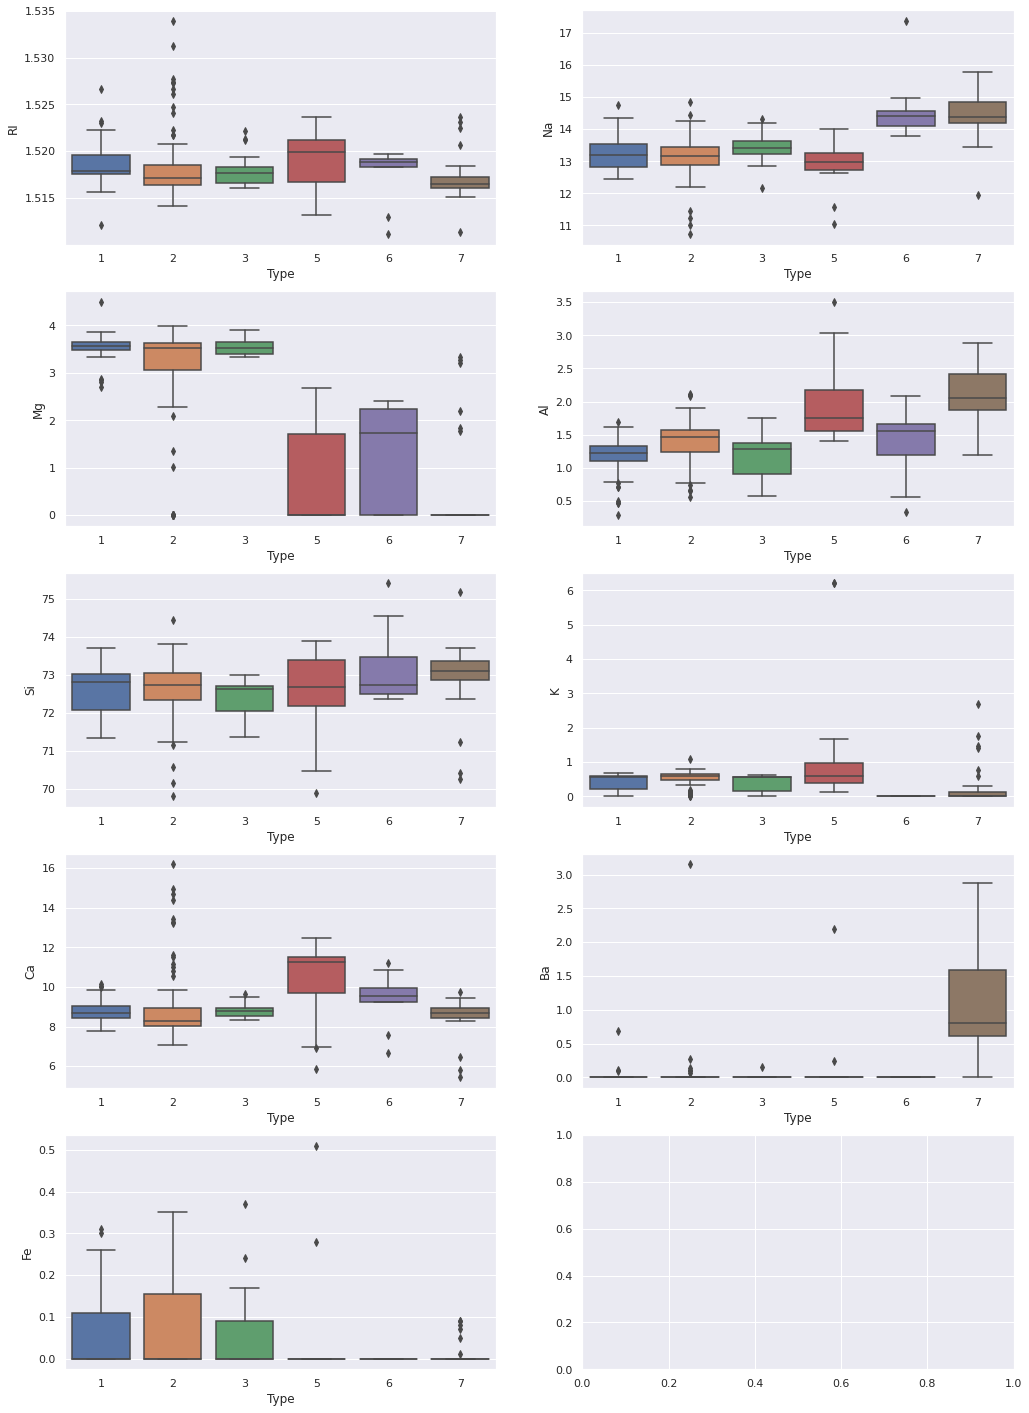

In [511]:
draw_graphs(glass_data, dataframe_cols)

In [512]:
def draw_hist(df: pd.core.frame.DataFrame, dt_cols:list):
  sns.set_theme()
  num_title = 0
  if(len(dt_cols)%2):
    len_cols = int((len(dt_cols) + 1) // 2) 
  else:
    len_cols = int(len(dt_cols) // 2)

  fig, ax = plt.subplots(nrows=len_cols, ncols=2, figsize=(17,25))
  for i in range(len_cols):
    for k in range(2):
      try:
        sns.histplot(ax=ax[i, k], x=glass_data[dt_cols[num_title]], bins=50)
        num_title+=1
      except:
        return

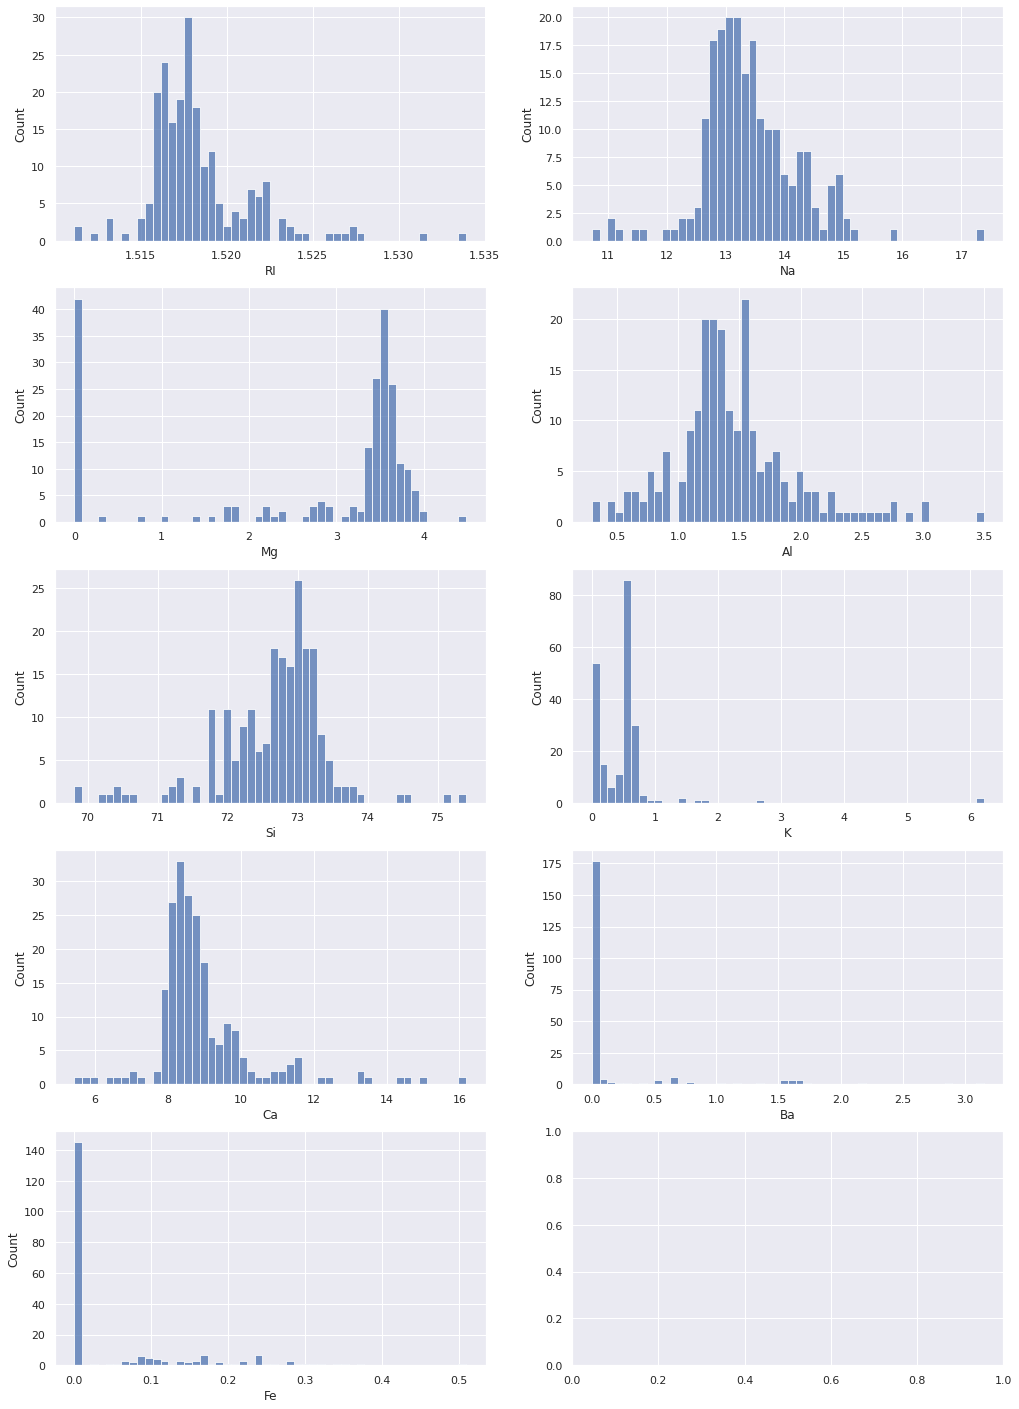

In [513]:
draw_hist(glass_data, dataframe_cols)

In [514]:
glass_data_copy = glass_data.copy()


In [515]:
for col in dataframe_cols:
  Q1 = np.percentile(glass_data_copy[col], 10, method = 'inverted_cdf')
  Q3 = np.percentile(glass_data_copy[col], 90, method = 'inverted_cdf')
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q3 - 1.5 * IQR
  glass_data_copy = glass_data_copy.loc[glass_data_copy[col]>=lower]
  glass_data_copy = glass_data_copy.loc[glass_data_copy[col]<=upper]

In [516]:
glass_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 209
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      185 non-null    float64
 1   Na      185 non-null    float64
 2   Mg      185 non-null    float64
 3   Al      185 non-null    float64
 4   Si      185 non-null    float64
 5   K       185 non-null    float64
 6   Ca      185 non-null    float64
 7   Ba      185 non-null    float64
 8   Fe      185 non-null    float64
 9   Type    185 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.9 KB


In [517]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(glass_data_copy.drop('Type', axis=1), glass_data_copy['Type'], random_state=42, test_size=0.2)

In [518]:
rfc_model1 = RandomForestClassifier(random_state=42, 
                                  n_estimators=150,
                                  max_depth=4,
                                  max_samples=0.5,
                                  max_features=0.5)

In [519]:
rfc_model1.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=4, max_features=0.5, max_samples=0.5,
                       n_estimators=150, random_state=42)

In [520]:
rfc_pred1 = rfc_model1.predict(X_test1)

In [521]:
IQR_train = rfc_model1.score(X_train1, y_train1)
IQR_train

0.8581081081081081

In [522]:
IQR_test = rfc_model1.score(X_test1, y_test1)
IQR_test

0.8648648648648649

In [523]:
IQR_test_trad =  rfc_model1.score(X_test, y_test)
IQR_test_trad

0.8604651162790697

In [524]:
glass_data_copy1 = glass_data.copy()

In [525]:
glass_data_copy1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [526]:
oc_cvm_model = OneClassSVM(nu=0.05)

In [527]:
oc_cvm_model.fit(glass_data_copy1.drop('Type', axis=1), glass_data_copy1['Type'])

OneClassSVM(nu=0.05)

In [528]:
oc_cvm_model_pred = oc_cvm_model.predict(glass_data_copy1.drop('Type', axis=1))

In [529]:
oc_cvm_model_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [530]:
len(oc_cvm_model_pred)

214

In [531]:
len(glass_data_copy1)

214

In [532]:
glass_data_copy1 = glass_data_copy1.loc[oc_cvm_model_pred == 1]

In [533]:
len(glass_data_copy1)

203

In [534]:
glass_data_copy1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [535]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(glass_data_copy1.drop('Type', axis=1), glass_data_copy1['Type'], random_state=42, test_size=0.2)

In [536]:
rfc_model2 = RandomForestClassifier(random_state=42, 
                                  n_estimators=150,
                                  max_depth=4,
                                  max_samples=0.5,
                                  max_features=0.5)
rfc_model2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=4, max_features=0.5, max_samples=0.5,
                       n_estimators=150, random_state=42)

In [537]:
oc_cvm_train = rfc_model2.score(X_train2, y_train2)
oc_cvm_train

0.8333333333333334

In [538]:
oc_cvm_test = rfc_model2.score(X_test2, y_test2)
oc_cvm_test

0.6829268292682927

In [539]:
oc_cvm_test_trad = rfc_model2.score(X_test, y_test)
oc_cvm_test_trad

0.813953488372093

In [540]:
glass_data_copy2 = glass_data.copy()

isol_forest = IsolationForest(random_state=42, 
                              n_estimators=150,
                              max_samples=0.5,
                              max_features=0.5)
isol_forest.fit(glass_data_copy2.drop('Type', axis=1), glass_data_copy2['Type'])

isol_forest_pred = isol_forest.predict(glass_data_copy2.drop('Type', axis=1))

In [541]:
isol_forest_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1])

In [542]:
len(isol_forest_pred)

214

In [543]:
glass_data_copy2 = glass_data_copy2.loc[isol_forest_pred == 1]

len(glass_data_copy2)

181

In [544]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(glass_data_copy2.drop('Type', axis=1), glass_data_copy2['Type'], random_state=42, test_size=0.2)

In [545]:
rfc_model3 = RandomForestClassifier(random_state=42, 
                                  n_estimators=150,
                                  max_depth=4,
                                  max_samples=0.5,
                                  max_features=0.5)
rfc_model3.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=4, max_features=0.5, max_samples=0.5,
                       n_estimators=150, random_state=42)

In [546]:
isol_forest_train = rfc_model3.score(X_train3, y_train3)
isol_forest_train

0.8333333333333334

In [547]:
isol_forest_test = rfc_model3.score(X_test3, y_test3)
isol_forest_test

0.7027027027027027

In [548]:
isol_forest_test_trad = rfc_model3.score(X_test, y_test)
isol_forest_test_trad

0.7906976744186046

In [549]:
lof = LocalOutlierFactor(novelty=True)

In [550]:
glass_data_copy3 = glass_data.copy()

In [551]:
glass_data_copy3.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [552]:
lof.fit(glass_data_copy3.drop('Type', axis=1), glass_data_copy3['Type'])

LocalOutlierFactor(novelty=True)

In [553]:
lof_pred = lof.predict(glass_data_copy3.drop('Type', axis=1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [554]:
lof_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [555]:
glass_data_copy3 = glass_data_copy3.loc[lof_pred == 1]

len(glass_data_copy3)

184

In [556]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(glass_data_copy3.drop('Type', axis=1), glass_data_copy3['Type'], random_state=42, test_size=0.2)

In [557]:
rfc_model4 = RandomForestClassifier(random_state=42, 
                                  n_estimators=150,
                                  max_depth=4,
                                  max_samples=0.5,
                                  max_features=0.5)
rfc_model4.fit(X_train4, y_train4)

RandomForestClassifier(max_depth=4, max_features=0.5, max_samples=0.5,
                       n_estimators=150, random_state=42)

In [558]:
lof_train = rfc_model4.score(X_train4, y_train4)
lof_train

0.8707482993197279

In [559]:
lof_test = rfc_model4.score(X_test4, y_test4)
lof_test

0.7297297297297297

In [560]:
lof_test_trad = rfc_model4.score(X_test, y_test)
lof_test_trad

0.7906976744186046

In [561]:
columns_list = ['Тренировочные данные', 'Тестовые данные', 'Исходные тестовые данные']

index_list = ['Без очистки', 'Межквартильный размах', 'OneClassSVM', 'IsolationForest', 'LocalOutlierFactor']

np_arr_results = np.array([[raw_train, raw_test, np.nan], [IQR_train, IQR_test, IQR_test_trad], [oc_cvm_train, oc_cvm_test, oc_cvm_test_trad], [isol_forest_train, isol_forest_test, isol_forest_test_trad], [lof_train, lof_test, lof_test_trad]])

In [566]:
scores_table = pd.DataFrame(np_arr_results, columns=columns_list, index=index_list).sort_values('Тестовые данные', ascending=False)

In [567]:
scores_table

,Тренировочные данные,Тестовые данные,Исходные тестовые данные
Межквартильный размах,0.858108,0.864865,0.860465
Без очистки,0.935673,0.837209,NaN
LocalOutlierFactor,0.870748,0.729730,0.790698
IsolationForest,0.833333,0.702703,0.790698
OneClassSVM,0.833333,0.682927,0.813953


Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.


Выводы:

а) Было произведено графическое отображение данных - в виде гистограмм и "ящика с усами"; выбросы удалялись несколькими методами - межквартильного размаха, OneClassSVM, IsolationForest, LocalOutlierFactor. При этом, когда я удалял выбросы посредством межквартильного размаха, несколько поэкспериментировал с данными - при установке 25-го и 75-го процентилей точность модели очень сильно падала, при установке процентилей менее 10 и более 90 точность модели приближалась к таковой на "сырых" данных. Поэтому решил остановиться на процентилях 90 и 10, с их использованием отмечается некоторый выигрыш в точности на тестовых данных и незначительная потеря точности на тренировочных данных.  

b) Наилучшими по точности оказались данные после очистки по методу межквартильного размаха (см.таблицу). Хотел пояснить, что колонка исходные тестовые данные - это тестовые данные без очистки (X_test, y_test) - можно сказать что это попытка воссоздать ситуацию, когда обученную на очищенных данных модель используют на данных, предоставленных клиентом - здесь также первую позицию занял межквартильный размах.

с) Безусловно, необходимо исследовать данные на выбросы, т.к. последние искажают выборку и снижают точность модели. Однако к удалению выбросов необходимо подходить дифференцированно, т.к. удаление слишком большого количества данных могут привести к переобучению на тренировочных данных и снижению точности классификации и регрессии на тестовых данных.